# Introdution NumPy

Use NumPy to calculate the mean return of a portfolio.

In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
#create a list
stock_list = [3.5, 5, 2, 8, 4.2]

In [56]:
#make an array by calling a function on the list
returns = np.array(stock_list)
print (returns, type(returns))

[3.5 5.  2.  8.  4.2] <class 'numpy.ndarray'>


In [57]:
#modify returns array with a scalar value
returns*2 + 5

array([12. , 15. ,  9. , 21. , 13.4])

In [58]:
#exercise NumPy functionality
print ("Mean: ", np.mean(returns), "Std Dev: ", np.std(returns))

Mean:  4.54 Std Dev:  1.9915822855207364


Simulation of a universe of stocks using NumPy's functions

In [59]:
#these arrays will be used to build a portfolio
N = 10
assets = np.zeros((N,100))
returns = np.zeros((N, 100))

In [60]:
#simulate a base asset
#draw 100 random samples from a normal distribution with mean 1.01 and std 0.03
R_1 = np.random.normal(1.01, 0.03, 100)
returns[0] = R_1
assets[0] = np.cumprod(R_1)

In [61]:
# Generate assets that are correlated with R_1
for i in range(1,N):
    R_1 = R_1 + np.random.normal(0.001, 0.02, 100)
    returns[i] = R_1 #Set each row of returns equal to the new R_i array
    assets[i] = np.cumprod(R_1)
    
mean_returns = [(np.mean(R)-1)*100 for R in returns]
return_volatilities = [np.std(R) for R in returns]

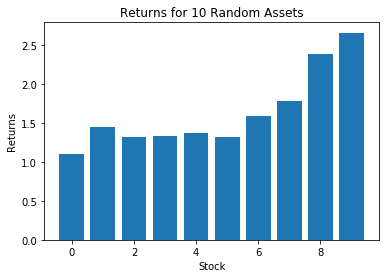

In [62]:
plt.bar(np.arange(len(mean_returns)), mean_returns)
plt.xlabel('Stock')
plt.ylabel('Returns')
plt.title('Returns for {0} Random Assets'.format(N));

Put universe of stocks in a portfolio and calculate its expected return and risk.

Calculate expected returns.

In [63]:
#generate random weights and normalize
weights = np.random.uniform(0, 1, N)
weights = weights/np.sum(weights)

In [64]:
#calculate the mean return of the portfolio
p_returns = np.dot(weights, mean_returns) #this yields the summ of all asset reutns scaled by their respective weights
print ("Expected return of the portfolio: ", p_returns)

Expected return of the portfolio:  1.6950122539649135
